# ProSettings Data
## Imports

In [61]:
import os
import time
import matplotlib.pyplot as plt
from numpy import dtype

import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver

## Helper Funcs

In [62]:
def get_table(url):
    """
    Get table from url
    """
    driver = webdriver.Chrome(executable_path=os.path.abspath("chromedriver"))
    driver.implicitly_wait(5)
    driver.get(url)
    driver.maximize_window()

    time.sleep(5)

    html = driver.page_source
    driver.quit()
    soup = BeautifulSoup(html, "html.parser")
    table = soup.find("table")

    # Save table to file
    with open("table.html", "w", encoding="utf-8") as file:
        file.write(str(table))

    return table


def get_table_data(table):
    """
    Get table data
    """
    table_data = []
    for row in table.find_all("tr"):
        table_data.append([])
        for cell in row.find_all("td"):
            table_data[-1].append(cell.text)

    table_data = [row for row in table_data if row != []]
    return table_data


def get_table_columns(table):
    """
    Get table columns
    """
    table_columns = []
    for row in table.find_all("tr"):
        table_columns.append([])
        for cell in row.find_all("th"):
            table_columns[-1].append(cell.text)

    table_columns = [row for row in table_columns if row != []]
    return table_columns


def print_table(table_data):
    """
    Print table
    """
    for row in table_data:
        print(row)

## Set URL

In [63]:
url = "https://prosettings.net/cs-go-pro-settings-gear-list/"

## Extract Data from ProSettings

In [64]:
table = get_table(url)
table_data = get_table_data(table)
table_columns = get_table_columns(table)

C:\Users\Walks\AppData\Local\Temp\ipykernel_26452\3675173765.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=os.path.abspath("chromedriver"))


## Create Dataframe

In [65]:
# Combine table data and columns into one dataframe
dataframe = pd.DataFrame(table_data, columns=table_columns)

# Drop rows with NaN values
dataframe = dataframe.dropna(axis=0, how="any")

# Convert dtypes
dataframe = dataframe.convert_dtypes()

# Replace commas
dataframe = dataframe.replace(to_replace=",", value="", regex=True)

# Convert to numeric
dataframe.update(dataframe.apply(pd.to_numeric, errors="coerce"))
dataframe = dataframe.apply(pd.to_numeric, errors="ignore")

# Filter for following Teams:
# FaZe, NaVi, Cloud9, ENCE, Astralis, Vitality, Movistar Riders, G2, NiP, MOUZ
# dataframe = dataframe[dataframe["Team"].isin(["FaZe", "NaVi", "Cloud9", "ENCE", "Astralis", "Vitality", "Movistar Riders", "G2", "NiP", "MOUZ"])]

# Show dataframe
dataframe

,Team,Player,Role,Mouse,M. HZ,DPI,Sens,eDPI,Zoom Sens,Accel,...,Monitor,HZ,GPU,Resolution,Aspect Ratio,Scaling Mode,Mousepad,Keyboard,Headset,CFG
0,,,,,NaN,NaN,NaN,NaN,NaN,NaN,...,,NaN,,,,,,,,
1,NaVi (B),Boombl4,Rifler,Zowie EC1,1000.0,400.0,1.45,580.0,0.86,0.0,...,BenQ XL2546,240.0,RTX 3090,1280x960,4:3,STR,Logitech G640,SteelSeries APEX M750 TKL,Logitech G Pro X Headset,CONFIG
2,NaVi,electronic,Rifler,Logitech G Pro X Superlight White,1000.0,400.0,2.20,880.0,1.05,0.0,...,BenQ XL2546K,240.0,RX 6900 XT,1280x960,4:3,STR,Logitech G640,Logitech G915 TKL White,Logitech G Pro X Wireless Headset,CONFIG
3,NaVi,sdy,Rifler,FinalMouse Starlight 12 Phantom,1000.0,800.0,1.00,800.0,1.00,0.0,...,BenQ XL2546K,240.0,RTX 3080,1280x1024,5:4,STR,Logitech G640 NAVI,Logitech G915 TKL,Logitech G Pro X Headset,CONFIG
4,NaVi,s1mple,AWPer,Logitech G Pro X Superlight White,1000.0,400.0,3.09,1236.0,1.00,0.0,...,BenQ XL2546K,240.0,RTX 3090,1280x960,4:3,STR,HATOR It's nice to be s1mple,Logitech G915 TKL,Logitech G Pro X Headset,CONFIG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Streamer,seangares,Rifler,HyperX Pulsefire Haste,1000.0,400.0,1.90,760.0,1.00,1.0,...,BenQ XL2546,240.0,GTX 980 Ti,1680x1050,16:10,STR,HyperX FURY S Pro,HyperX Alloy FPS RGB,HyperX Cloud Alpha GE,CONFIG
482,Streamer,Lobanjica,Rifler,Zowie EC1 Tyloo Edition,1000.0,800.0,1.70,1360.0,1.00,0.0,...,BenQ XL2540,240.0,RTX 2080 Ti,1024x768,4:3,STR,Zowie G-SR,Razer Huntsman TE,Sennheiser Momentum In-Ear,CONFIG
483,Streamer,FlipiN,Rifler,Logitech G Pro X Superlight Black,1000.0,800.0,1.30,1040.0,1.00,0.0,...,MSI Optix MAG251RX,240.0,RTX 2080 Super,1024x768,4:3,BB,AIM Gaming Alfombrilla,Logitech G Pro X Mechanical Keyboard,AIM Gaming Auriculares,CONFIG
484,Streamer,swag / brax,Rifler,VAXEE ZYGEN NP-01,1000.0,400.0,1.50,600.0,1.00,1.0,...,BenQ XL2546S,240.0,RTX 2080 Ti,1920x1080,16:9,,Razer Goliathus Speed,Logitech G Pro X Mechanical Keyboard,Sennheiser GAME ZERO,CONFIG


## Peek at Data

In [66]:
dataframe.dtypes

Team             object
Player           object
Role             object
Mouse            object
M. HZ           float64
DPI             float64
Sens            float64
eDPI            float64
Zoom Sens       float64
Accel           float64
Win Sens        float64
Raw input       float64
Monitor          object
HZ              float64
GPU              object
Resolution       object
Aspect Ratio     object
Scaling Mode     object
Mousepad         object
Keyboard         object
Headset          object
CFG              object
dtype: object

## Plot eDPI as chart

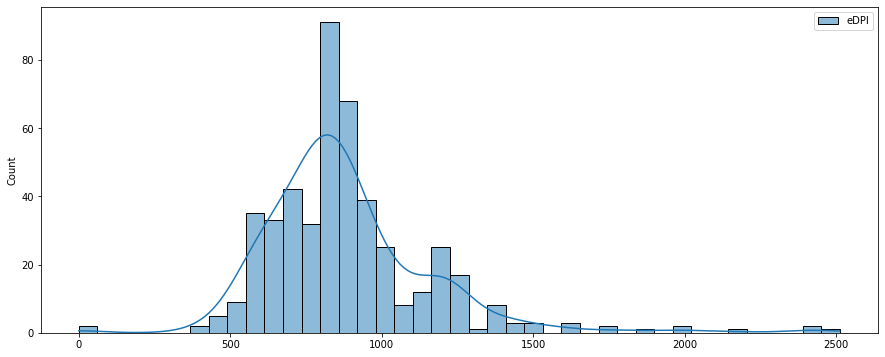

In [67]:
# Use seaborn to plot "eDPI" numbers
plt.figure(figsize=(15, 6))
sns.histplot(dataframe["eDPI"], kde=True)
plt.show()

## Plot Most Common Resolutions

In [72]:
resolutions = dataframe["Resolution"]
# plot resolution frequency
plt.figure(figsize=(15, 6))
sns.countplot(resolutions)
plt.show()

,Resolution
count,486
unique,18
top,1280x960
freq,202
